# Regression Analysis and Linear Classification
จัดทำโดย จิรายุ เพชรแหน ภาควิชาวิศวกรรมคอมพิวเตอร์ คณะวิศวกรรมศาสตร์ สถาบันเทคโนโลยีพระจอมเกล้าเจ้าคุณทหารลาดกระบัง

----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


!pip install opendatasets
import opendatasets as od

od.download('https://www.kaggle.com/datasets/farhanmd29/50-startups')

df = pd.read_csv('./50-startups/50_Startups.csv')
df.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 1
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/farhanmd29/50-startups


100%|██████████| 1.30k/1.30k [00:00<00:00, 3.53MB/s]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


---
#### Single variable, e.g., Marketing Spend to Profit

In [2]:
X = df[['Marketing Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((40, 1), (10, 1))

In [3]:
x_train

,Marketing Spend
12,249839.44
4,366168.42
37,197029.42
8,311613.29
3,383199.62
6,127716.82
41,164470.71
46,297114.46
47,0.00
15,261776.23


In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_predictions = lin_reg.predict(x_test)
x_test, y_predictions

(    Marketing Spend
 13        252664.93
 39        174999.30
 30         91131.24
 45          1903.93
 17        282574.31
 48             0.00
 26        134050.07
 25        137962.62
 32         46085.25
 19             0.00,
 array([120440.33174329,  98457.01051638,  74718.08631455,  49462.22193873,
        128906.20665138,  48923.31296724,  86866.2968753 ,  87973.74740994,
         61967.78134498,  48923.31296724]))

In [5]:
lin_reg.coef_, lin_reg.intercept_ # Take a look at the parameters learnt

(array([0.28305083]), np.float64(48923.31296724075))

<function matplotlib.pyplot.show(close=None, block=None)>

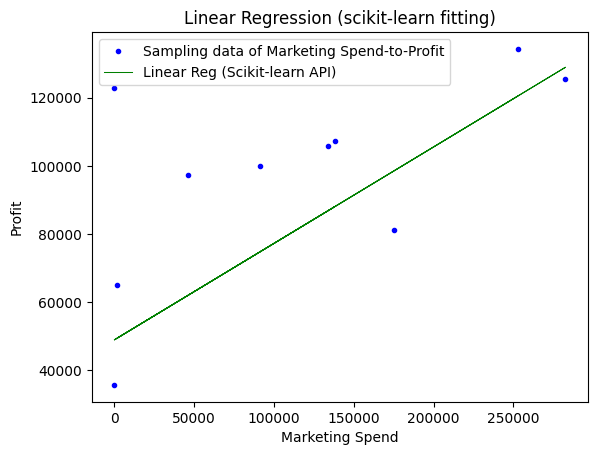

In [6]:
plt.plot(x_test, y_test, "b.", label='Sampling data of Marketing Spend-to-Profit')
# plt.plot(X, y_test, "r-.", label='True expression', linewidth=0.5)
y_hat = lin_reg.coef_[0]*x_test + lin_reg.intercept_
plt.plot(x_test, y_predictions, "g-", label='Linear Reg (Scikit-learn API)', linewidth=0.75)
# plt.axis([0, 2, 0, 15])
plt.title('Linear Regression (scikit-learn fitting)')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.legend()
plt.show

In [7]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

900533964.2328259

In [8]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

23639.881154096685

In [9]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(30008.898084282035)

In [10]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: -0.11205578997827947


----
### Correlation analysis and try to use R&D Spend as single and only variable

In [11]:
# Add correlation analysis
df_nonstate = df.drop('State', axis=1)
correlation_matrix = df_nonstate.corr().style.background_gradient()
display(correlation_matrix)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [12]:
X = df[['R&D Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_predictions = lin_reg.predict(x_test)
y_predictions

array([127862.20996405,  82250.56334619, 102255.72078164,  50190.4734756 ,
       130136.88190548,  49799.36685472, 113638.0775288 , 104535.0534288 ,
       103463.04843113, 123105.31102669])

In [14]:
lin_reg.coef_, lin_reg.intercept_

(array([0.85360911]), np.float64(49336.6680379911))

<function matplotlib.pyplot.show(close=None, block=None)>

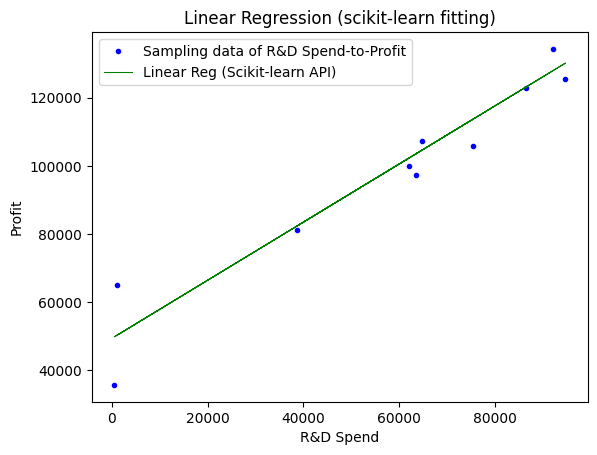

In [15]:
plt.plot(x_test, y_test, "b.", label='Sampling data of R&D Spend-to-Profit')
# plt.plot(X, y_test, "r-.", label='True expression', linewidth=0.5)
y_hat_linear = lin_reg.coef_[0]*x_test + lin_reg.intercept_
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg (Scikit-learn API)', linewidth=0.75)
# plt.axis([0, 2, 0, 15])
plt.title('Linear Regression (scikit-learn fitting)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show

In [16]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(7714.334890830185)

In [17]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9265108109341951


---
#### Multiple Variable, e.g., all features [R&D Spend, ..., Marketing Spend]



In [18]:
df_num = df.drop('State', axis=1)
X = df_num.drop('Profit',axis=1)
y = df_num['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [19]:
x_train

,R&D Spend,Administration,Marketing Spend
12,93863.75,127320.38,249839.44
4,142107.34,91391.77,366168.42
37,44069.95,51283.14,197029.42
8,120542.52,148718.95,311613.29
3,144372.41,118671.85,383199.62
6,134615.46,147198.87,127716.82
41,27892.92,84710.77,164470.71
46,1315.46,115816.21,297114.46
47,0.00,135426.92,0.00
15,114523.61,122616.84,261776.23


In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

y_predictions = lin_reg.predict(x_test)
y_predictions

array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

In [21]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

80926321.22295158

In [22]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

6979.152252370402

In [23]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(8995.905803361415)

In [24]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9000653083037321


---
### Polynomial (Single-var)

In [25]:
X = df[['R&D Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly,y_train)

x_test_poly = poly_features.fit_transform(x_test)
y_predictions = lin_reg.predict(x_test_poly)
y_predictions

array([128786.75560231,  82466.85162857, 103090.73390656,  48411.29736649,
       131031.23848365,  47988.21456969, 114610.26131746, 105410.0139386 ,
       104319.99947052, 124072.87281665])

In [27]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(47487.448733379264), array([ 9.24074522e-01, -4.38224307e-07]))

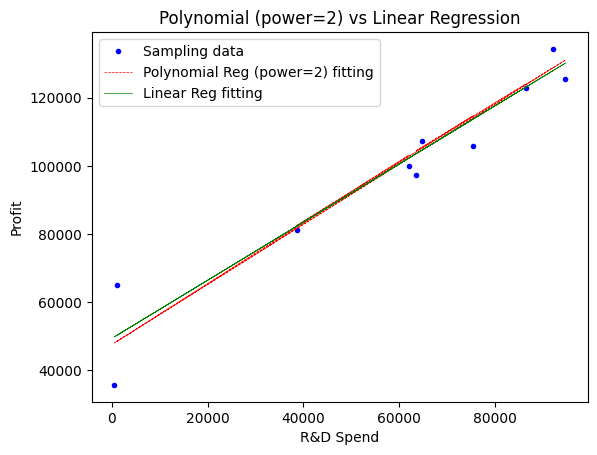

In [28]:
# Plot the data
plt.plot(x_test, y_test, "b.", label='Sampling data')

# Plot the polynomial regression curve
y_hat_poly2 = lin_reg.coef_[0]*x_test + lin_reg.coef_[1]*(x_test**2) + lin_reg.intercept_
plt.plot(x_test, y_hat_poly2, "r--", label='Polynomial Reg (power=2) fitting', linewidth=0.5)

# Plot the simple linear regression line
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg fitting', linewidth=0.5)


plt.title('Polynomial (power=2) vs Linear Regression')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
# plt.axis([-3, 3, 0, 10])
plt.show()

(np.float64(0.0),
 np.float64(80000.0),
 np.float64(47500.0),
 np.float64(120000.0))

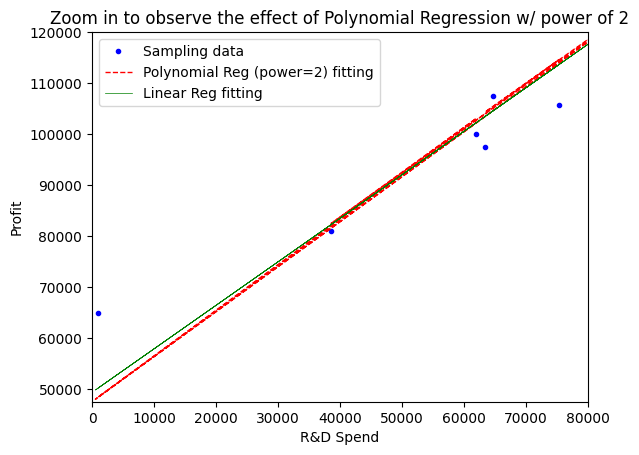

In [29]:
plt.plot(x_test, y_test, "b.", label='Sampling data')
plt.plot(x_test, y_hat_poly2, "r--", label='Polynomial Reg (power=2) fitting', linewidth=1)
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg fitting', linewidth=0.5)
plt.title('Zoom in to observe the effect of Polynomial Regression w/ power of 2')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.axis([0, 80000, 47500, 120000]) # [xmin, xmax, ymin, ymax]

In [30]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

63094698.59322874

In [31]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

6368.450528569773

In [32]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(7943.2171437792595)

In [33]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9220853097447484


3rd degree

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly,y_train)

x_test_poly = poly_features.fit_transform(x_test)
y_predictions = lin_reg.predict(x_test_poly)
y_predictions

array([126222.41070681,  87313.07857057, 106280.28647418,  40999.95576583,
       127986.14984856,  40264.04121464, 115364.83396795, 108163.96743326,
       107283.0533454 , 122582.18949463])

In [35]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(39387.12190465252),
 array([ 1.62410226e+00, -1.16832245e-05,  4.66293356e-11]))

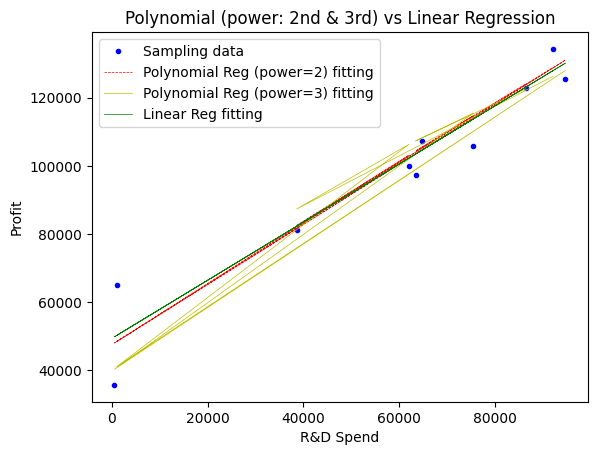

In [36]:
# Plot the data
plt.plot(x_test, y_test, "b.", label='Sampling data')

# Plot the polynomial regression curve (deg=2)
plt.plot(x_test, y_hat_poly2, "r--", label='Polynomial Reg (power=2) fitting', linewidth=0.5)

# Plot the polynomial regression curve (deg=3)
y_hat_poly3 = lin_reg.coef_[0]*x_test + lin_reg.coef_[1]*(x_test**2) + lin_reg.coef_[2]*(x_test**3) + lin_reg.intercept_
plt.plot(x_test, y_hat_poly3, "y-", label='Polynomial Reg (power=3) fitting', linewidth=0.5)

# Plot the simple linear regression line
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg fitting', linewidth=0.5)


plt.title('Polynomial (power: 2nd & 3rd) vs Linear Regression')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
# plt.axis([-3, 3, 0, 10])
plt.show()

In [37]:
# Sort x_test and get the corresponding indices
x_test_sorted = x_test.sort_values(by='R&D Spend')
sorted_indices = x_test_sorted.index

# Reindex y_hat_poly3 to match the sorted x_test
y_hat_poly3_sorted = y_hat_poly3.reindex(sorted_indices)

print('True expression:\n',x_test_sorted,'\nPoly-feature (3rd-deg) predictions:\n',y_hat_poly3_sorted)

True expression:
     R&D Spend
48     542.05
45    1000.23
39   38558.51
30   61994.48
32   63408.86
25   64664.71
26   75328.87
19   86419.70
13   91992.39
17   94657.16 
Poly-feature (3rd-deg) predictions:
         R&D Spend
48   40264.041215
45   40999.955766
39   87313.078571
30  106280.286474
32  107283.053345
25  108163.967433
26  115364.833968
19  122582.189495
13  126222.410707
17  127986.149849


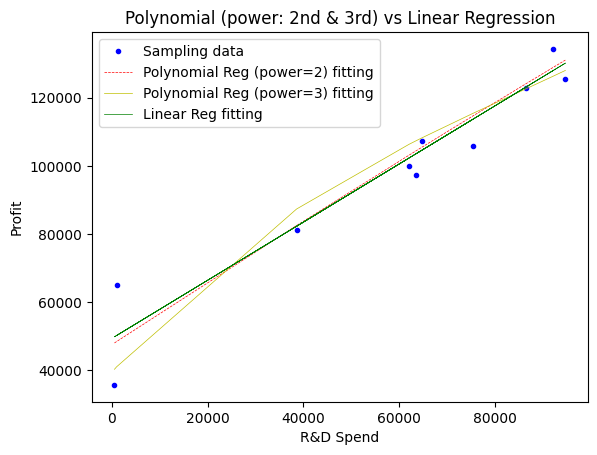

In [38]:
# Plot the data
plt.plot(x_test, y_test, "b.", label='Sampling data')

# Plot the polynomial regression curve (deg=2)
plt.plot(x_test_sorted['R&D Spend'], y_hat_poly2.reindex(sorted_indices), "r--", label='Polynomial Reg (power=2) fitting', linewidth=0.5)

# Plot the polynomial regression curve (deg=3)
y_hat_poly3 = lin_reg.coef_[0]*x_test_sorted['R&D Spend'] + lin_reg.coef_[1]*(x_test_sorted['R&D Spend']**2) + lin_reg.coef_[2]*(x_test_sorted['R&D Spend']**3) + lin_reg.intercept_
plt.plot(x_test_sorted['R&D Spend'], y_hat_poly3, "y-", label='Polynomial Reg (power=3) fitting', linewidth=0.5)

# Plot the simple linear regression line
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg fitting', linewidth=0.5)


plt.title('Polynomial (power: 2nd & 3rd) vs Linear Regression')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
# plt.axis([-3, 3, 0, 10])
plt.show()

In [39]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

93625591.3546363

In [40]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

7230.829488729767

In [41]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(9676.031797934333)

In [42]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.8843831714390008


---
### Polynomial (Multi-var)

In [43]:
df_num = df.drop('State', axis=1)
X = df_num.drop('Profit',axis=1)
y = df_num['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly,y_train)

x_test_poly = poly_features.fit_transform(x_test)
y_predictions = lin_reg.predict(x_test_poly)
y_predictions

array([127847.00518864,  85112.32235097,  95568.69250711,  42469.57103414,
       130233.04602766,  40156.96833478, 109698.73111041, 101570.72550455,
        93458.11976512, 108223.28785227])

In [45]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

90304882.2778587

In [46]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

7506.0645971984

In [47]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(9502.888101932944)

In [48]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.8884838649190184


----
### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the binary target variable
df['Profit_Class'] = (df['Profit'] > 150000).astype(int) # 1: positive, 0: negative

# Select features and target
# Using the numerical features from the previous multiple variable example
df_num = df.drop('State', axis=1)
X = df_num.drop(['Profit', 'Profit_Class'], axis=1)
y = df_num['Profit_Class']

In [50]:
y

,Profit_Class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [51]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8285714285714286
Confusion Matrix:
[[24  4]
 [ 2  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.56      0.71      0.62         7

    accuracy                           0.83        35
   macro avg       0.74      0.79      0.76        35
weighted avg       0.85      0.83      0.84        35



----
### ฝึกฝนด้วยตัวเอง

ชุดข้อมูลประเมินคุณภาพไวน์ (Wine quality) จากข้อมูลคุณลักษณะที่มี (feature attributes) ได้แบ่งการประเมินเป็นคะแนนคุณภาพ "Quality" column
1. ต้องการสร้างโมเดลทำนายคะแนนคุณภาพไวน์ (Hint: การวิเคราะห์การถดถอยเชิงเส้น)

2. โมเดลคัดแบตซ์ไวน์มีคุณภาพไม่ ให้เกณฑ์การคัดแยกอยุ่ที่ 6 คะแนน (> 6 คะแนน เท่ากับไวน์ดี มิฉะนั้น <= 6 คะแนน เท่ากับไวน์คุณภาพแย่) (Hint: การจำแนกประเภท)

```python
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("piyushgoyal443/red-wine-dataset")

print(os.listdir(path)) # choose "['wineQualityReds.csv']"

csv_path = os.path.join(path, 'wineQualityReds.csv')
df = pd.read_csv(csv_path)
```

In [52]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("piyushgoyal443/red-wine-dataset")

print(os.listdir(path)) # choose "['wineQualityReds.csv']"

csv_path = os.path.join(path, 'wineQualityReds.csv')
df = pd.read_csv(csv_path)

100%|██████████| 29.4k/29.4k [00:00<00:00, 35.5MB/s]

Extracting files...
['wineQualityReds.csv', 'wineQualityInfo.txt']


In [53]:
df.head()
df.drop('Unnamed: 0', axis=1, inplace=True)

In [54]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Regression


In [55]:
# Add correlation analysis
correlation_matrix = df.corr().style.background_gradient()
display(correlation_matrix)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [78]:
X = df.drop(['quality', 'pH', 'free.sulfur.dioxide', 'residual.sugar'],axis=1)
# X = df[['alcohol', 'sulphates', 'volatile.acidity',	'citric.acid']]
y = df['quality']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x_train, y_train

(      fixed.acidity  volatile.acidity  citric.acid  chlorides  \
 493             8.7             0.690         0.31      0.086   
 354             6.1             0.210         0.40      0.066   
 342            10.9             0.390         0.47      0.118   
 834             8.8             0.685         0.26      0.088   
 705             8.4             1.035         0.15      0.073   
 ...             ...               ...          ...        ...   
 1130            9.1             0.600         0.00      0.058   
 1294            8.2             0.635         0.10      0.073   
 860             7.2             0.620         0.06      0.077   
 1459            7.9             0.200         0.35      0.054   
 1126            5.8             0.290         0.26      0.063   
 
       total.sulfur.dioxide  density  sulphates  alcohol  
 493                   81.0  1.00020       0.74     11.6  
 354                  165.0  0.99120       0.59     11.9  
 342                   14.0  

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_train_poly,y_train)

LinearRegression()

In [80]:
# Summary result
y_predictions = lin_reg.predict(x_test)
y_predictions_poly = lin_reg_poly.predict(poly_features.fit_transform(x_test))

lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, y_predictions)

lin_mse_poly = mean_squared_error(y_test, y_predictions_poly)
lin_rmse_poly = np.sqrt(lin_mse_poly)
lin_r2_poly = r2_score(y_test, y_predictions_poly)


print(f"Linear Regression:\nMSE: {lin_mse}, RMSE: {lin_rmse}, R2: {lin_r2}")
print(f"Polynomial Regression:\nMSE: {lin_mse_poly}, RMSE: {lin_rmse_poly}, R2: {lin_r2_poly}")

Linear Regression:
MSE: 0.39254767260771556, RMSE: 0.6265362500348368, R2: 0.39932034735979216
Polynomial Regression:
MSE: 0.37366302636023024, RMSE: 0.6112798265608234, R2: 0.42821778718618664


#Classification

In [81]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the binary target variable
df['quality_class'] = (df['quality'] > 6).astype(int) # 1: positive, 0: negative

X = df.drop(['quality', 'quality_class'], axis=1)
y = df['quality_class']
y.value_counts()

,count
quality_class,
0,1382
1,217


In [94]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8640625
Confusion Matrix:
[[1086   16]
 [ 158   20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1102
           1       0.56      0.11      0.19       178

    accuracy                           0.86      1280
   macro avg       0.71      0.55      0.56      1280
weighted avg       0.83      0.86      0.82      1280



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
